# Random cluster examples

To express the usage and simplicity of SPIN we will make a simple example with some random clusters in the plane. The random clusters will be generated by multivariate gaussians with random center and a random standard deviation equal for both dimensions.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from spin import SPIN
from spin.distances import l2_distance_matrix

%matplotlib inline

## Generating Data

In [3]:
n_clusters = 5
n_points_per_cluster = 1000

cluster_points = []

for i in range(n_clusters):
    center = (np.random.uniform(0, 4), np.random.uniform(0, 4))
    std = np.random.uniform(0, 0.1, 1)
    cov_matrix = [[std, 0], [0, std]]
    points = np.random.multivariate_normal(center,
                                           cov_matrix,
                                           n_points_per_cluster).T
    cluster_points.append(points)

### Visualizing data

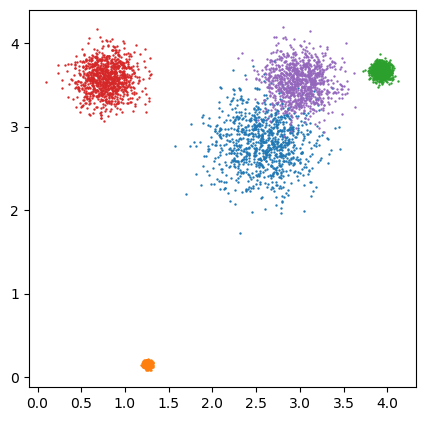

In [4]:
f, ax = plt.subplots(figsize=(5, 5), dpi=100)
for i in range(n_clusters):
    ax.scatter(*cluster_points[i], s=.5)

## Joining and shuffling all cluster points

To test SPIN reorder ability lets put all points in random order.

In [5]:
points = np.concatenate(cluster_points, axis=1)
index = [i for i in range(points.shape[1])]
np.random.shuffle(index)
points = points[:, index]

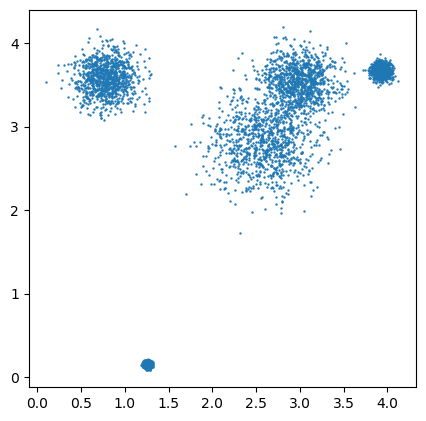

In [6]:
f, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.scatter(*points, s=0.5)

## Distances

In [7]:
distances = l2_distance_matrix(points, points)

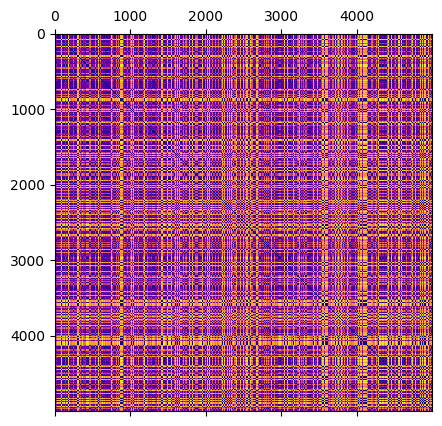

In [8]:
f, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.matshow(distances, cmap="plasma")

## Side to side SPIN 

In [9]:
%%time
n_points = points.shape[1]
incr_vector = np.array([i-(n_points+1)/2 for i in range(n_points)])

CPU times: user 2.1 ms, sys: 254 µs, total: 2.35 ms
Wall time: 2.36 ms


In [28]:
sts_spin = SPIN(method='sts')

In [49]:
sts_spin = SPIN(method='ajsdfla')

In [29]:
"bal" in {"sts"}

False

In [23]:
permutation = sts_spin.run(distances, incr_vector, 1000)

TypeError: run() takes 2 positional arguments but 4 were given

In [118]:
ordered_distances = permutation.dot(distances).dot(permutation.T)

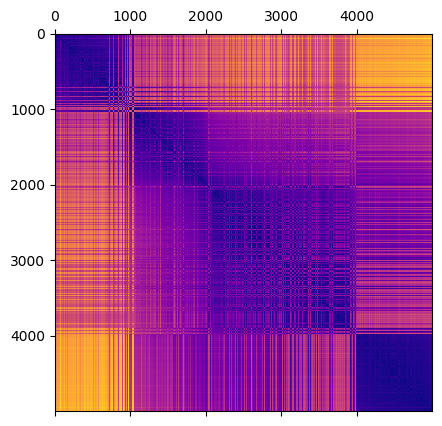

In [119]:
f, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.matshow(ordered_distances, cmap="plasma")